In [5]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import hypernetx.algorithms.hypergraph_modularity as hmod
import pandas as pd
import igraph as ig
import hypernetx as hnx

import warnings
warnings.simplefilter(action='ignore')

In [2]:
testFile = '/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_03_01_multiwayInteractions/2023_03_01_v0_dataGathering/v0_poreC_explore/testSet_HG'
colNames = ["ReadID","Cardinality","GeneID","bioType","GeneName","dist","readLength","readQual"]
df = pd.read_csv(testFile,sep = "\t",names = colNames)

In [3]:
binMat = pd.pivot_table(data=df[['ReadID', 'GeneName']], index='GeneName', columns='ReadID', aggfunc=lambda x: 1, fill_value=0)
binMat.shape

(1046, 512)

In [6]:
H = hnx.Hypergraph.from_incidence_dataframe(binMat)

In [7]:
HG = hmod.precompute_attributes(H)


In [8]:
K = hmod.kumar(HG)

Text(0.5, 1.0, 'Cluster Sizes')

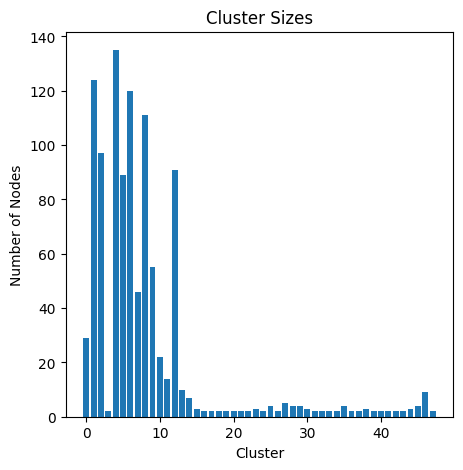

In [16]:
clusterSizes = [len(s) for s in K]
x = range(len(clusterSizes))

plt.subplots(figsize=(5,5))
plt.bar(x, clusterSizes)
plt.xlabel('Cluster')
plt.ylabel('Number of Nodes')
plt.title('Cluster Sizes')

In [21]:
sortedClusters = sorted(zip(K,clusterSizes), key = lambda x:x[1],reverse = True)
top_clusters = [cluster for cluster, size in sortedClusters[:3]]

In [24]:
top3 = H.restrict_to_nodes(nodes=set.union(*top_clusters))

In [ ]:
# hnx.draw(top3.collapse_nodes_and_edges(),with_node_counts = True, with_edge_counts = True,
#          node_labels = False, edge_labels = False)